<a href="https://colab.research.google.com/github/malgsujd28/data-science/blob/main/satysfakcja_klienta_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISCLAIMER: Wykonanie niektórych komórek z kodem może zająć powyżej 20 minut**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Wczytanie zbiorów

In [ ]:
data_test = pd.read_csv('test.csv')
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Przygotowanie danych (zamiana wartości nieliczbowych na liczbowe, uzupełnienie braków, skalowanie, podział na train i test, wizualizacja outlier'ów)

In [ ]:
data_train['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [ ]:
data_train['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [ ]:
data_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
data_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
scaler = StandardScaler()

datasets = [data_train, data_test]

for i in datasets:
  i['satisfaction'] = [0 if x =='neutral or dissatisfied' else 1 for x in i['satisfaction']]
  i['Gender'] = [0 if x =='Male' else 1 for x in i['Gender']]
  i['Customer Type'] = [0 if x =='disloyal Customer' else 1 for x in i['Customer Type']]
  i['Type of Travel'] = [0 if x =='Personal Travel' else 1 for x in i['Type of Travel']]
  i.replace({'Business':2, 'Eco Plus':1, 'Eco':0}, inplace=True)
  i['Arrival Delay in Minutes'].fillna(i['Arrival Delay in Minutes'].median(), inplace=True)
  i = scaler.fit_transform(i)


In [ ]:
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,1,1,52,1,0,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,1,1,36,1,2,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,0,0,20,1,0,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,0,1,44,1,2,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,1,1,49,1,0,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,1,13,0,1,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,0,25,1,2,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,1,26,1,2,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,1,25,1,2,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,1,61,1,2,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
y_train=data_train['satisfaction']
X_train=data_train.drop(columns=['Unnamed: 0','id','satisfaction'], axis=1)

In [ ]:
y_test=data_test['satisfaction']
X_test=data_test.drop(columns=['Unnamed: 0','id','satisfaction'], axis=1)

In [ ]:
X_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
X_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

<Axes: >

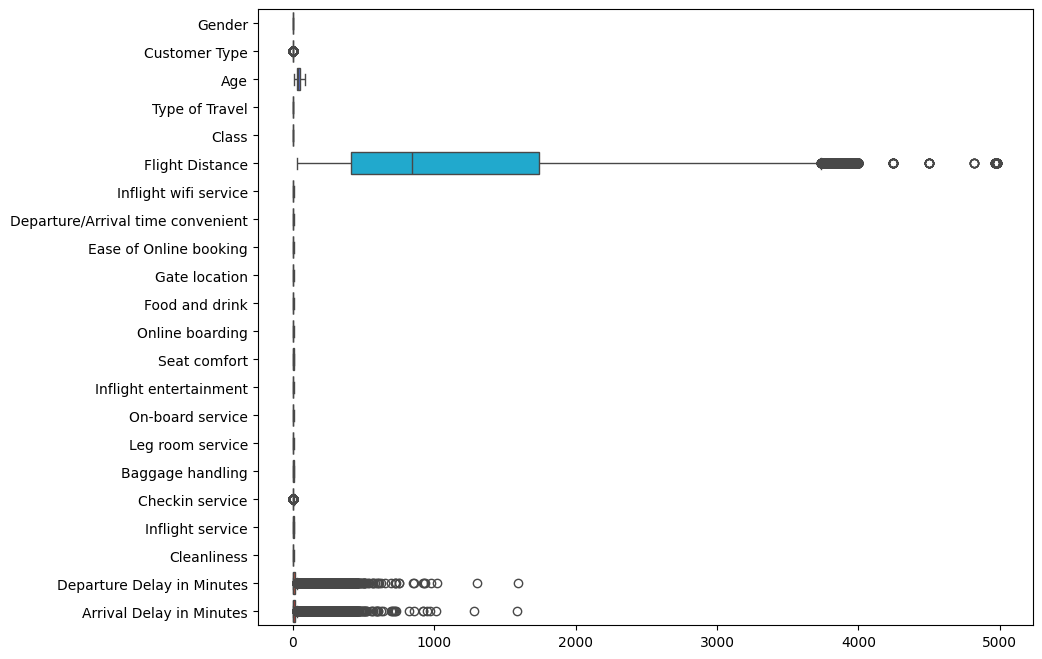

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=X_train.loc[:,X_train.columns != 'class_type'], orient='h', palette='rainbow')

In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(X_train['Flight Distance'])
print(tukey_indices)
tukey_indices, tukey_values = find_outliers_tukey(X_train['Departure Delay in Minutes'])
print(tukey_indices)
tukey_indices, tukey_values = find_outliers_tukey(X_train['Arrival Delay in Minutes'])
print(tukey_indices)

[80, 173, 201, 215, 379, 388, 421, 446, 458, 473, 483, 569, 634, 717, 778, 794, 799, 869, 879, 939, 978, 994, 1061, 1068, 1092, 1101, 1114, 1120, 1186, 1236, 1248, 1252, 1269, 1417, 1425, 1496, 1541, 1548, 1587, 1705, 1752, 1846, 1847, 1876, 1932, 1948, 2156, 2194, 2208, 2213, 2286, 2297, 2363, 2392, 2401, 2495, 2544, 2556, 2619, 2628, 2659, 2736, 2803, 2818, 2847, 2970, 2981, 3027, 3030, 3046, 3090, 3129, 3186, 3282, 3379, 3401, 3405, 3407, 3485, 3486, 3516, 3525, 3660, 3773, 3838, 3866, 3912, 3927, 4003, 4013, 4031, 4071, 4073, 4114, 4134, 4362, 4363, 4539, 4545, 4593, 4676, 4725, 4762, 4794, 4832, 4849, 4930, 4935, 4939, 4941, 5170, 5216, 5276, 5342, 5370, 5381, 5383, 5409, 5466, 5504, 5554, 5583, 5639, 5650, 5703, 5732, 5733, 5743, 5750, 5758, 5779, 5781, 5866, 5903, 5985, 6058, 6135, 6159, 6259, 6328, 6348, 6489, 6506, 6535, 6617, 6753, 6776, 6778, 6812, 6846, 6882, 6959, 6967, 7104, 7106, 7120, 7138, 7150, 7206, 7306, 7326, 7346, 7351, 7355, 7393, 7496, 7648, 7683, 7688, 7690, 79

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Customer Type'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Type of Travel'}>,
        <Axes: title={'center': 'Class'}>],
       [<Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>],
       [<Axes: title={'center': 'Leg room service'}>,
        <Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight 

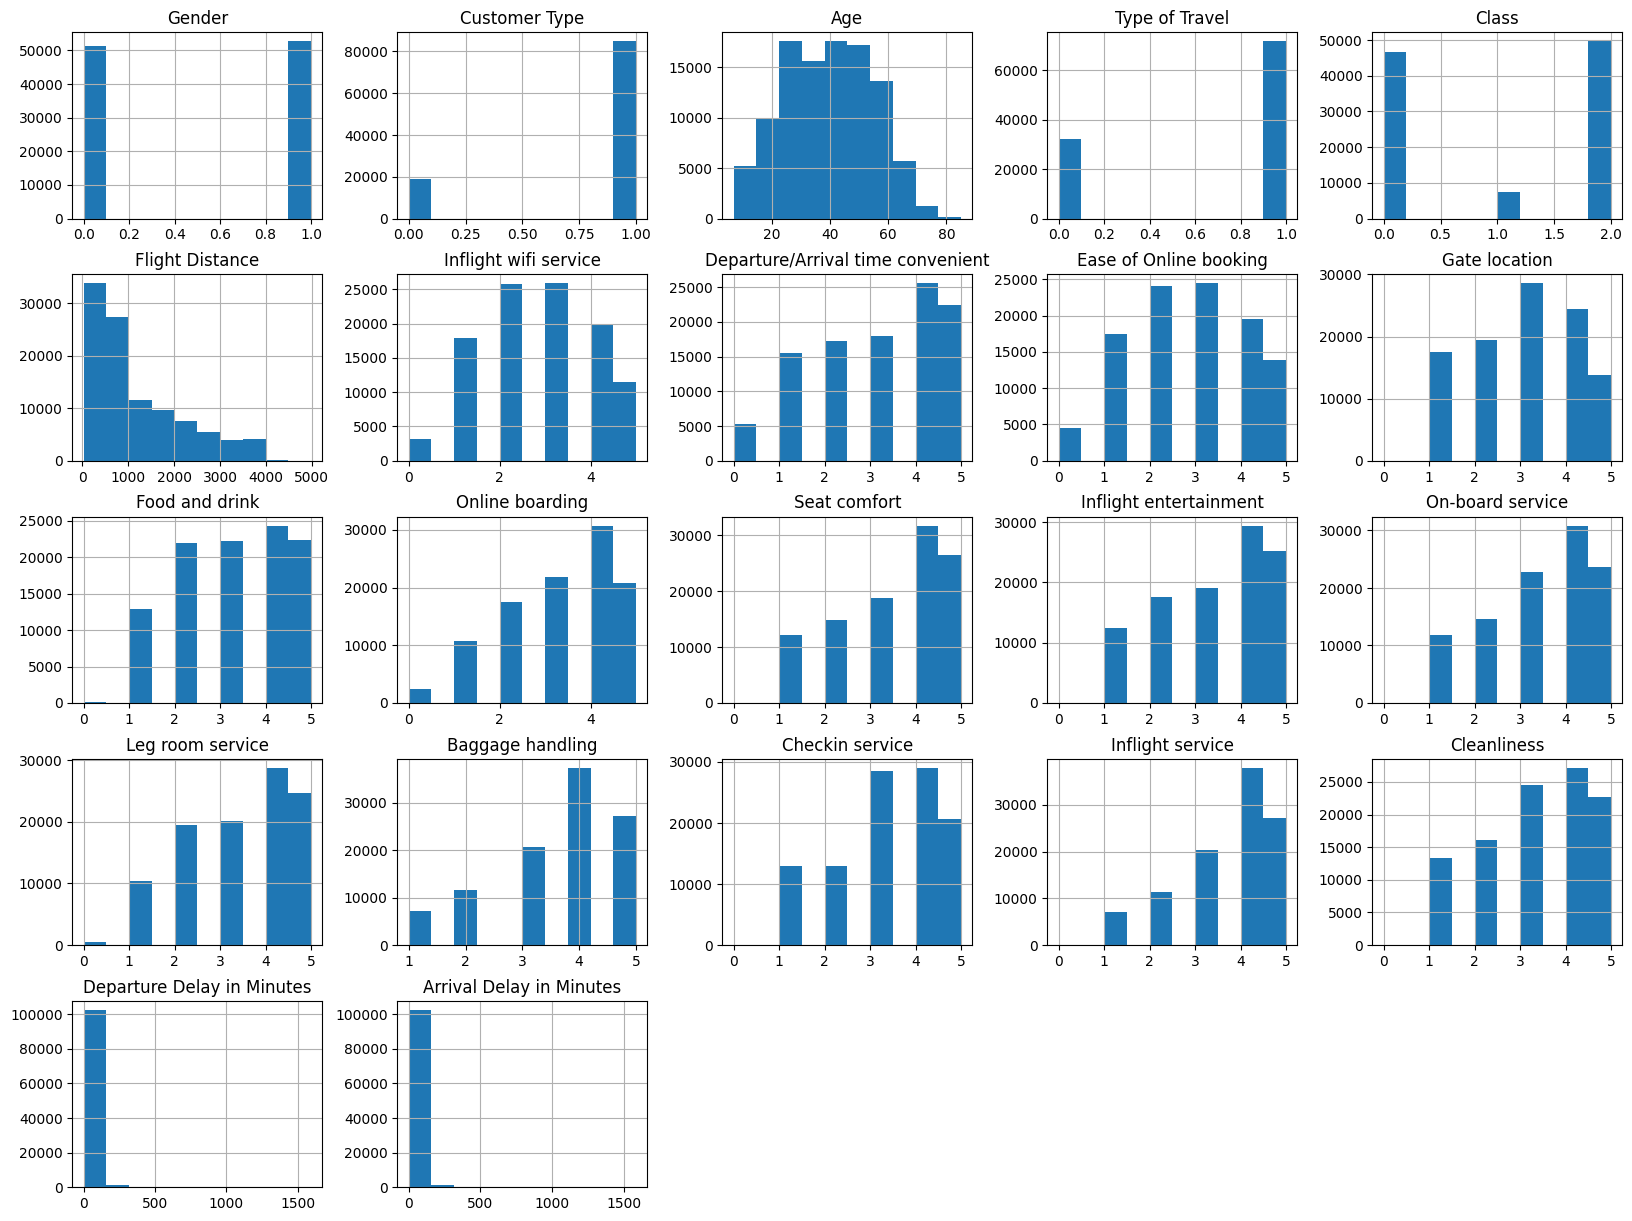

In [ ]:
X_train.hist(figsize = (20, 15))

# Algorytmy

## DecisionTree

###Model bazowy DTC

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



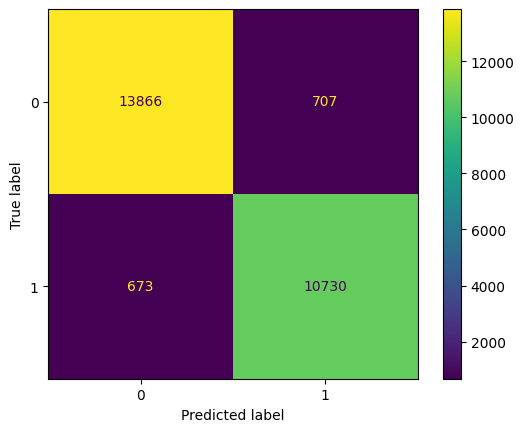

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

DecisionTreeClassifier zdaje się prezentować dobre wyniku już ze swoimi defaultowymi wartościami hiperparametrów, ale poniżej spróbujemy poddać go optymalizacji

###Optymalizacja skupiona na przeuczeniu

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
values = [i for i in range(1, 15)]

In [ ]:
from sklearn.metrics import accuracy_score
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.788, test: 0.783
>2, train: 0.860, test: 0.860
>3, train: 0.885, test: 0.884
>4, train: 0.889, test: 0.888
>5, train: 0.905, test: 0.905
>6, train: 0.920, test: 0.920
>7, train: 0.931, test: 0.929
>8, train: 0.938, test: 0.935
>9, train: 0.943, test: 0.940
>10, train: 0.949, test: 0.946
>11, train: 0.956, test: 0.951
>12, train: 0.962, test: 0.952
>13, train: 0.968, test: 0.955
>14, train: 0.971, test: 0.957


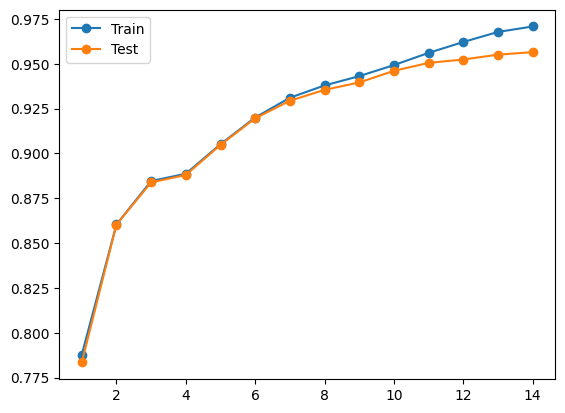

In [ ]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Model wydaje się być bardzo delikatnie przeuczony przy wyższych wartościach maksymalnej głębokości, ale mowa tutaj o naprawdę niewielkich różnicach.

In [ ]:
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14573
           1       0.90      0.92      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



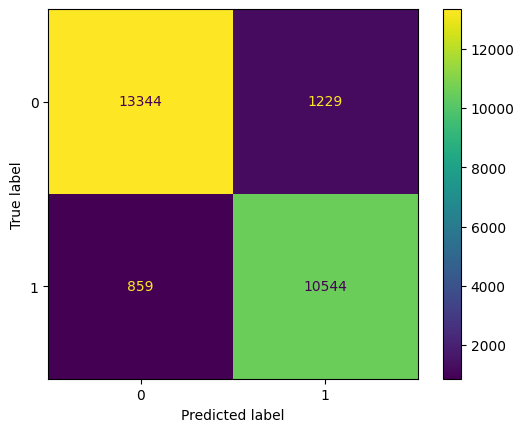

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

Tak wygląda nasz "nieprzetrenowany model", charakteryzuje się on jednak odrobine mniejszą dokładnością

###Optymalizacja kilku hiperparametrów z wykorzystaniem GridSearch'a

In [ ]:
dtc_par = {'criterion':['gini','entropy'],'max_depth': range(5,21,5),'min_samples_split':range(2,11,2)}
grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), dtc_par, cv=5)
grid_search_dtc.fit(X_train, y_train)
print("Najlepsze hiperparametry: ", grid_search_dtc.best_params_)

Najlepsze hiperparametry:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 8}


In [ ]:
best_dtc = DecisionTreeClassifier(criterion='gini',
                                  max_depth=15,
                                  min_samples_split=8)
best_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=8)

In [ ]:
y_pred = best_dtc.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



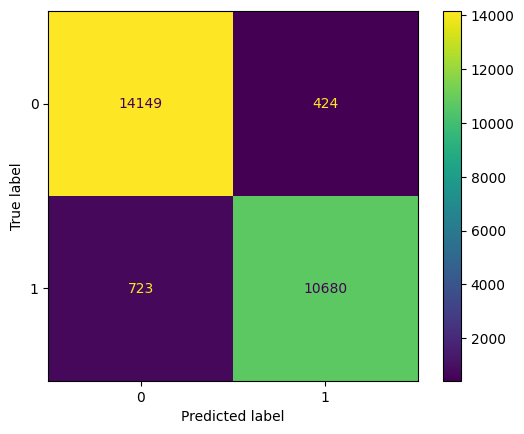

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_dtc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

Dzięki wykorzystaniu gridsearch'a, otrzymujemy bardzo podobny do deafultowego, wysokiej dokładności model. Optymalizacja sprawiła, że jest on nieznacznie lepszy niż model bazowy.

##Random Forest


### Model bazowy RFC

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



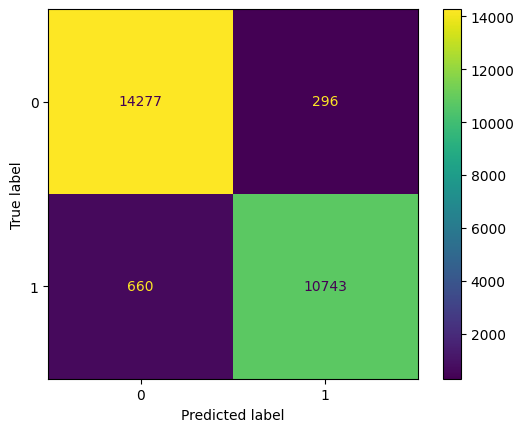

In [ ]:
rfc = RandomForestClassifier(random_state=88)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

RandomForestClassifier podobnie jak przed chwilą badany model DTC, już ze swoimi defaultowymi wartościami hiperparametrów prezentuje bardzo wysoką dokładność.

###Optymalizacja skupiona na przeuczeniu

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
for i in values:
    model = RandomForestClassifier(n_estimators=100, max_depth=i,random_state=88)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.848, test: 0.843
>2, train: 0.877, test: 0.874
>3, train: 0.898, test: 0.896
>4, train: 0.908, test: 0.908
>5, train: 0.923, test: 0.922
>6, train: 0.931, test: 0.932
>7, train: 0.934, test: 0.933
>8, train: 0.937, test: 0.937
>9, train: 0.942, test: 0.941
>10, train: 0.948, test: 0.945
>11, train: 0.954, test: 0.950
>12, train: 0.960, test: 0.953
>13, train: 0.966, test: 0.956
>14, train: 0.971, test: 0.957


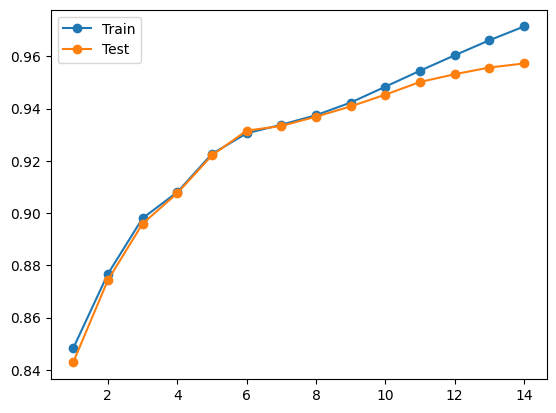

In [ ]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Poraz kolejny RTC zdaje się przypominać DTC, również przejawiając niewielkie, prawie niezauważalne oznaki przetrenowania dla największych testowanych przez nas głębokościach.

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
                               max_depth=9,
                               random_state=88)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13908   665]
 [  872 10531]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14573
           1       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

0.9408299969202341


To przykład wyników dla "nieprzetrenowanego" lasu o głębokości równej 9. Znowu wiąże się z kosztem nieco mniejszej dokładności.

###Optymalizacja kilku hiperparametrów z wykorzystaniem GridSearch'a

In [ ]:
rfc_par = {'n_estimators': [100, 200, 300],'max_depth': range(5,21,5)}
grid_search_rfc = GridSearchCV(RandomForestClassifier(), rfc_par, cv=5)
grid_search_rfc.fit(X_train, y_train)
print("Najlepsze hiperparametry: ", grid_search_rfc.best_params_)

Najlepsze hiperparametry:  {'max_depth': 20, 'n_estimators': 300}


In [ ]:
best_rfc = RandomForestClassifier(n_estimators=300,
                                  max_depth=20,)
best_rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [ ]:
y_pred = best_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



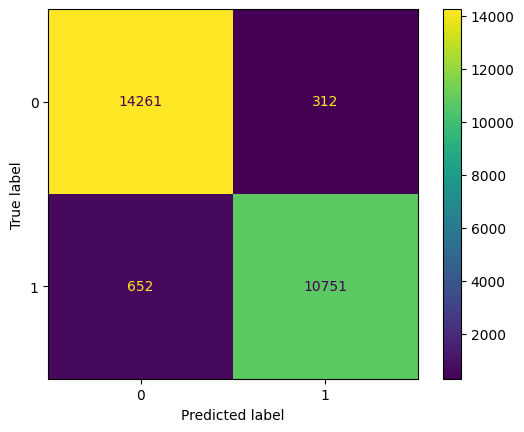

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_rfc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

Dokładność RTC po optymalizacji GridSearch'em zdaje się praktycznie nie zmieniać w porównaniu do jej bazowej wersji.

## KNN

### Model bazowy KNN

              precision    recall  f1-score   support

           0       0.76      0.81      0.79     14573
           1       0.74      0.67      0.70     11403

    accuracy                           0.75     25976
   macro avg       0.75      0.74      0.74     25976
weighted avg       0.75      0.75      0.75     25976



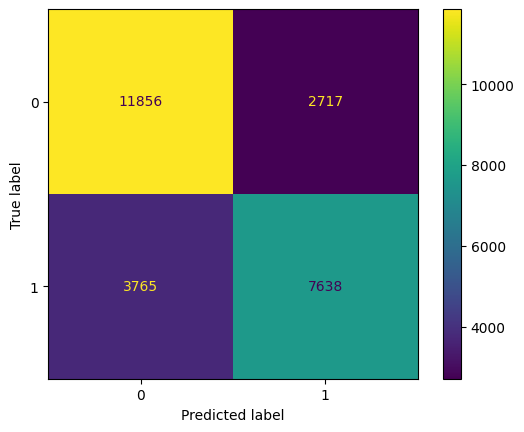

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

Tym razem testowany przez nas model cechuje się znacznie mniejszą dokładnością (w szczególności w porównaniu do pozostałych testowanych modeli), ale nadal można uznać ją za wystarczającą - jest powyżej wartości 0.7 (0.75)

###Optymalizacja skupiona na przeuczeniu

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.732
>2, train: 0.863, test: 0.733
>3, train: 0.872, test: 0.745
>4, train: 0.835, test: 0.744
>5, train: 0.837, test: 0.750
>6, train: 0.819, test: 0.750
>7, train: 0.819, test: 0.750
>8, train: 0.808, test: 0.749
>9, train: 0.807, test: 0.751
>10, train: 0.799, test: 0.750
>11, train: 0.798, test: 0.752
>12, train: 0.792, test: 0.747
>13, train: 0.791, test: 0.747
>14, train: 0.786, test: 0.747


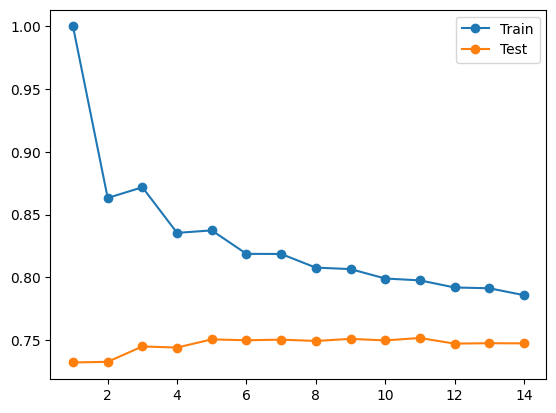

In [ ]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[11856  2717]
 [ 3765  7638]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     14573
           1       0.74      0.67      0.70     11403

    accuracy                           0.75     25976
   macro avg       0.75      0.74      0.74     25976
weighted avg       0.75      0.75      0.75     25976

0.7504619648906683


"Nieprzetrenowany model" - w tym przypadku dla n=5, czyli wartości takiej samej jak ta domyślna

###Optymalizacja kilku hiperparametrów z wykorzystaniem GridSearch'a

In [ ]:
knn_par = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_par, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Najlepsze hiperparametry: ", grid_search_knn.best_params_)

Najlepsze hiperparametry:  {'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     14573
           1       0.75      0.66      0.70     11403

    accuracy                           0.75     25976
   macro avg       0.75      0.74      0.75     25976
weighted avg       0.75      0.75      0.75     25976



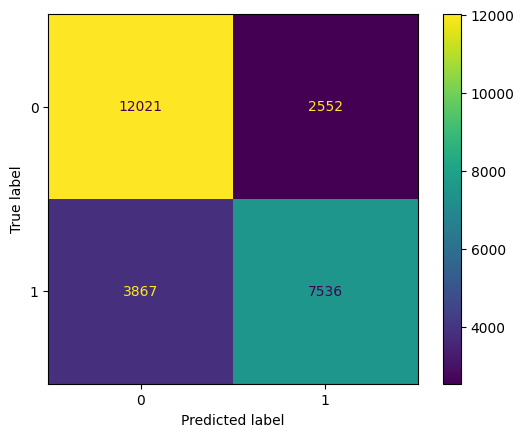

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

Praktycznie niezauważalna różnica w porównaniu do wyników bazowego modelu - model nadal odstaje w stosunku do dwóch wcześniej testowanych.

# Wnioski końcowe

Wszystkie testowane modele okazały się stosunkowo dobrze radzić w postawionym nam zadaniu. Najlepiej performował DecisionTreeClasifier oraz RandomForestClasifier - KNN znacząco od nich odstawał, chociaż też przedstawiał wyniki na poziomie dokładności, których przyjęcie możnaby rozważyć. Jednak to DTC jak i RFC prezentowały się doskonale jeżeli chodzi o dokładność, w dodatku nie potrzebowały praktycznie żadnej optymalizacji - ta okazywała się w bardzo małym stopniu lub wcale nie poprawiać ich działania (Swoją drogą była bardzo zasobożerna - często trwająca po kiklanaście minut, co próbowaliśmy niwelować kodem, którego już tu nie ma np.stosując PCA, chodź te okazało się mało skuteczne - przez to, że cechy nie mają za bardzo relacji liniowych, zresztą wiązało się to też z dużą utratą danych i znacznym pogorszeniem wyników, więc zaoszczędzony czas nie był tego warty). Wszystkie wspomniane modele zdają się cierpieć też na niewielkie przetrenowanie, lecz jest ono na poziomie tak niskim, że uważamy je raczej za akceptowalne.

W przypadku konieczności zdecydowania się na skorzystanie tylko jednego z algorytmów, postawilibyśmy raczej na RandomTreeClassifier, ponieważ oprócz tego, że prezentuje najlepszą dokładność, to jest jeszcze dodatkowo obarczony mniejszym ryzkiem przetrenowania.